# 01 - Data Exploration

This notebook explores the air quality dataset, its structure, and basic statistics.

Shape of Dataset: (29531, 16)

First 5 Rows:
         City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column 

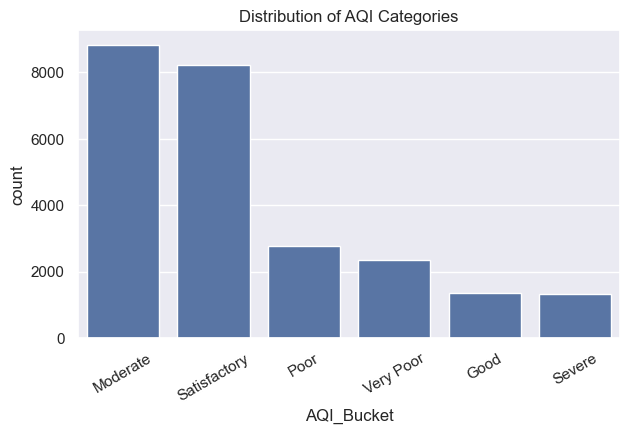

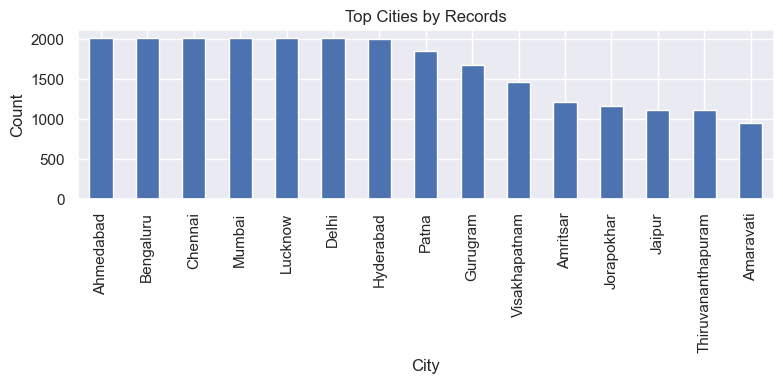

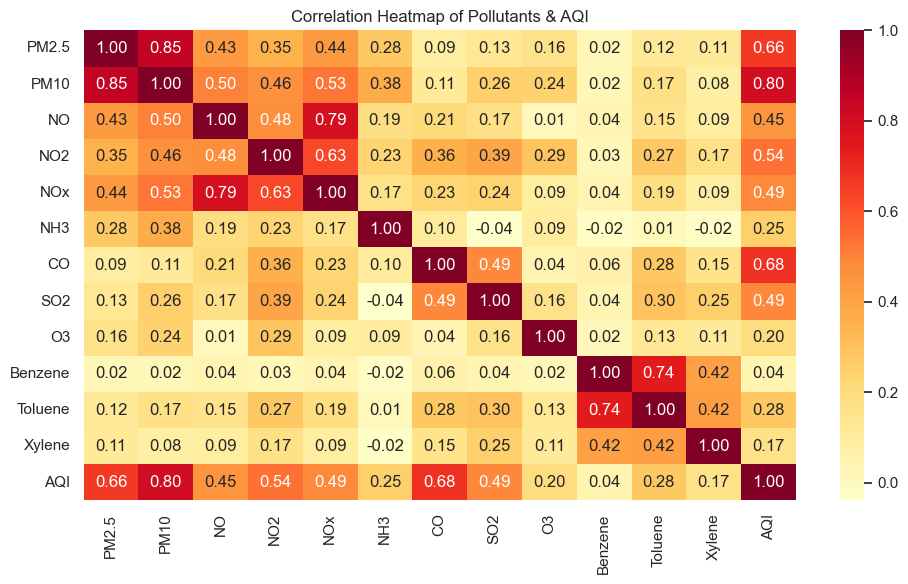

✅ Data exploration completed. Ready for preprocessing.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Load the dataset (expects AIR_QUALITY/data/air_quality.csv)
df = pd.read_csv('../data/air_quality.csv')

print('Shape of Dataset:', df.shape)
print('\nFirst 5 Rows:\n', df.head())
print('\n--- Dataset Info ---')
print(df.info())
print('\n--- Statistical Summary ---')
print(df.describe(include='all'))
print('\n--- Missing Values ---')
print(df.isnull().sum())

# Standardize column names (strip spaces)
df.columns = [c.strip() for c in df.columns]

# AQI_Bucket distribution and plot (if present)
if 'AQI_Bucket' in df.columns:
    print('\nAQI_Bucket Value Counts:\n', df['AQI_Bucket'].value_counts())
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index)
    plt.title('Distribution of AQI Categories')
    plt.xticks(rotation=30)
    plt.show()

# Top cities by record count (if City present)
if 'City' in df.columns:
    plt.figure(figsize=(8,4))
    df['City'].value_counts().head(15).plot(kind='bar')
    plt.title('Top Cities by Records')
    plt.xlabel('City'); plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Correlation heatmap for numeric cols
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Correlation Heatmap of Pollutants & AQI')
plt.tight_layout()
plt.show()

print('✅ Data exploration completed. Ready for preprocessing.')

➡️ Proceed to **02_preprocessing.ipynb** for data cleaning and feature engineering.